### IMPLEMENTING THE LINEAR REGRESSION

### Objective

#### To predict the profit made by a startup on the basis of expenses incurred and the state where they operate

In [1]:
#Importing the Libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [2]:
#Importing the dataset
import csv
data = open(r"C:\Users\hp\Desktop\Regression_tutorial\50_Startups.csv")
dataset=pd.read_csv(data)

In [3]:
dataset.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
len(dataset)

50

In [5]:
dataset.shape

(50, 5)

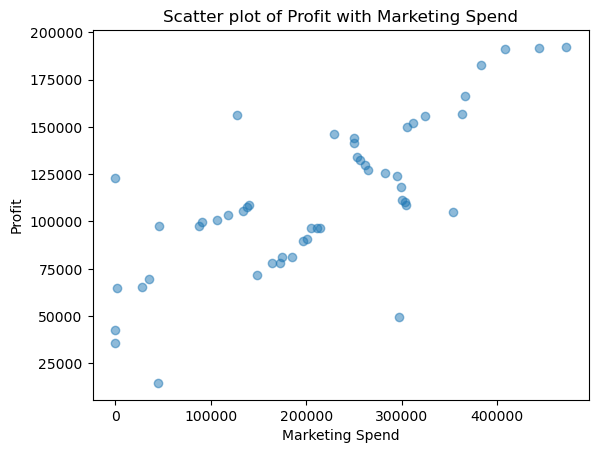

In [6]:
#Plotting the scatter graph of profit with marketing spend

plt.scatter(dataset['Marketing Spend'],dataset['Profit'],alpha=0.5)
plt.title('Scatter plot of Profit with Marketing Spend')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()

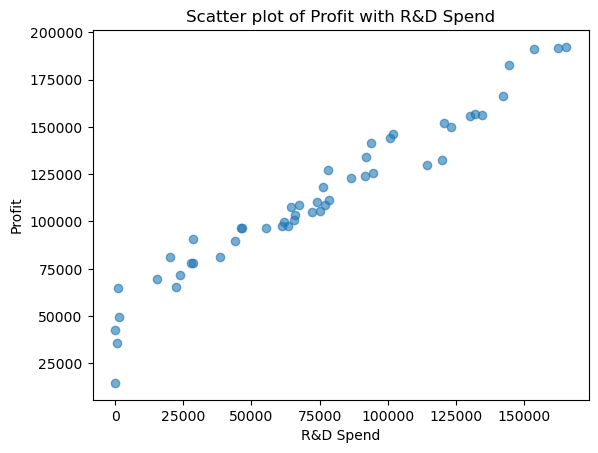

In [7]:
#Plotting graph of Profit with R&D Spend

plt.scatter(dataset['R&D Spend'],dataset['Profit'],alpha=0.6)
plt.title('Scatter plot of Profit with R&D Spend')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()

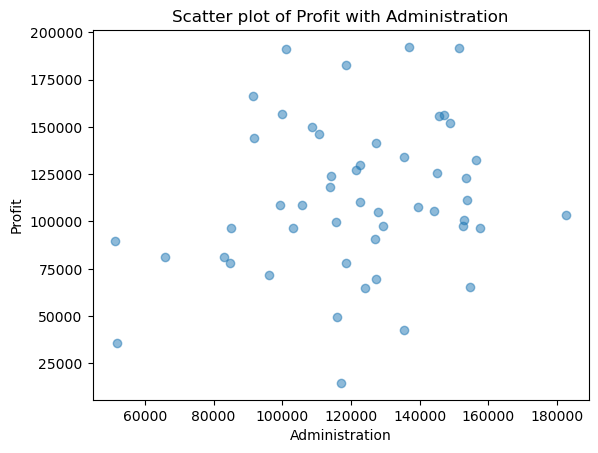

In [8]:
#Implementing graph of Profit with Administration

plt.scatter(dataset['Administration'],dataset['Profit'],alpha=0.5)
plt.title("Scatter plot of Profit with Administration")
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.show()

Text(0, 0.5, 'Profit')

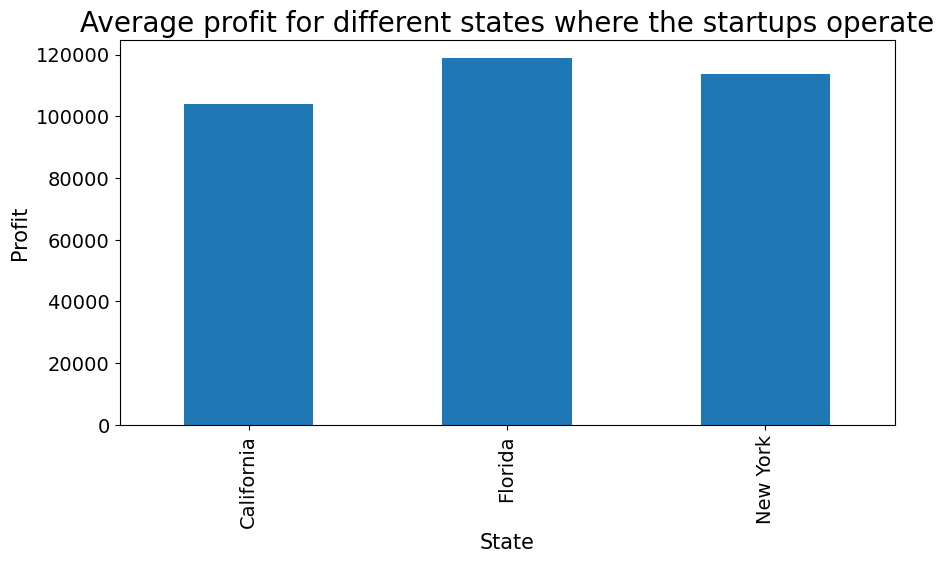

In [9]:
#Create the figure object
ax=dataset.groupby(['State'])['Profit'].mean().plot.bar(figsize=(10,5),fontsize=14)

# Set the title
ax.set_title("Average profit for different states where the startups operate",fontsize=20)

# Set x and y-labels
ax.set_xlabel("State",fontsize=15)
ax.set_ylabel("Profit",fontsize=15)

In [10]:
dataset.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [14]:
#create dummy variables for the categorical variable State

dataset['NewYork_State']=np.where(dataset['State']=='New York',1,0)
dataset['California_State']=np.where(dataset['State']=='California',1,0)
dataset['FLorida_State']=np.where(dataset['State']=='Florida',1,0)

# Drop the original column State from the dataframe
dataset.drop(columns=['State'],axis=1,inplace=True)

In [15]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit,NewYork_State,California_State,FLorida_State
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


In [16]:
dependent_variable='Profit'

In [17]:
# Create a list of independent variables
 
independent_variables=list(set(dataset.columns.tolist())-{dependent_variable})

In [18]:
independent_variables

['Marketing Spend',
 'NewYork_State',
 'FLorida_State',
 'R&D Spend',
 'California_State',
 'Administration']

In [19]:
# Create the data of independent variables 

X= dataset[independent_variables].values

# Create the data of dependent variable

y= dataset[dependent_variable].values

In [21]:
dataset[independent_variables]

,Marketing Spend,NewYork_State,FLorida_State,R&D Spend,California_State,Administration
0,471784.10,1,0,165349.20,0,136897.80
1,443898.53,0,0,162597.70,1,151377.59
2,407934.54,0,1,153441.51,0,101145.55
3,383199.62,1,0,144372.41,0,118671.85
4,366168.42,0,1,142107.34,0,91391.77
5,362861.36,1,0,131876.90,0,99814.71
6,127716.82,0,0,134615.46,1,147198.87
7,323876.68,0,1,130298.13,0,145530.06
8,311613.29,1,0,120542.52,0,148718.95
9,304981.62,0,0,123334.88,1,108679.17


In [22]:
#Splitting the dataset into the Training set and Test set

X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [23]:
X_train[0:10]

array([[2.1463481e+05, 0.0000000e+00, 1.0000000e+00, 5.5493950e+04,
        0.0000000e+00, 1.0305749e+05],
       [2.0551764e+05, 1.0000000e+00, 0.0000000e+00, 4.6014020e+04,
        0.0000000e+00, 8.5047440e+04],
       [1.3405007e+05, 0.0000000e+00, 1.0000000e+00, 7.5328870e+04,
        0.0000000e+00, 1.4413598e+05],
       [2.1079767e+05, 0.0000000e+00, 0.0000000e+00, 4.6426070e+04,
        1.0000000e+00, 1.5769392e+05],
       [2.9491957e+05, 0.0000000e+00, 1.0000000e+00, 9.1749160e+04,
        0.0000000e+00, 1.1417579e+05],
       [3.2387668e+05, 0.0000000e+00, 1.0000000e+00, 1.3029813e+05,
        0.0000000e+00, 1.4553006e+05],
       [2.5651292e+05, 0.0000000e+00, 1.0000000e+00, 1.1994324e+05,
        0.0000000e+00, 1.5654742e+05],
       [1.9039300e+03, 1.0000000e+00, 0.0000000e+00, 1.0002300e+03,
        0.0000000e+00, 1.2415304e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 5.4205000e+02,
        0.0000000e+00, 5.1743150e+04],
       [1.0713838e+05, 1.0000000e+00,

In [24]:
#Transforming data
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [25]:
X_train[0:10]

array([[0.45494286, 0.        , 1.        , 0.33561668, 0.        ,
        0.48655174],
       [0.43561799, 1.        , 0.        , 0.2782839 , 0.        ,
        0.3173015 ],
       [0.28413435, 0.        , 1.        , 0.45557444, 0.        ,
        0.87258866],
       [0.44680961, 0.        , 0.        , 0.2807759 , 1.        ,
        1.        ],
       [0.62511553, 0.        , 1.        , 0.55488118, 0.        ,
        0.59103645],
       [0.68649342, 0.        , 1.        , 0.7880179 , 0.        ,
        0.88568959],
       [0.54370828, 0.        , 1.        , 0.72539353, 0.        ,
        0.98922572],
       [0.0040356 , 1.        , 0.        , 0.0060492 , 0.        ,
        0.6847981 ],
       [0.        , 1.        , 0.        , 0.00327821, 0.        ,
        0.00432296],
       [0.22709197, 1.        , 0.        , 0.39676926, 0.        ,
        0.95618996]])

In [26]:
# Fitting Multiple Linear Regression to the Training set
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [27]:
regressor.intercept_

44153.95466784858

In [28]:
regressor.coef_


array([ 1.72720281e+04,  7.86007422e+02, -8.72645791e+02,  1.27892182e+05,
        8.66383692e+01,  3.49927567e+03])

In [29]:
y_pred_train=regressor.predict(X_train)

In [30]:
y_train


array([ 96778.92,  96479.51, 105733.54,  96712.8 , 124266.9 , 155752.6 ,
       132602.65,  64926.08,  35673.41, 101004.64, 129917.04,  99937.59,
        97427.84, 126992.93,  71498.49, 118474.03,  69758.98, 152211.77,
       134307.35, 107404.34, 156991.12, 125370.37,  78239.91,  14681.4 ,
       191792.06, 141585.52,  89949.14, 108552.04, 156122.51, 108733.99,
        90708.19, 111313.02, 122776.86, 149759.96,  81005.76,  49490.75,
       182901.99, 192261.83,  42559.73,  65200.33])

In [31]:
#Predicting the Test set results

y_pred=regressor.predict(X_test)

In [32]:
y_pred

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

In [33]:
y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

In [34]:
mean_squared_error(y_test,y_pred)

83502864.03257734

In [35]:
#Train performance

math.sqrt(mean_squared_error(y_test,y_pred))

9137.990152794942